# Week-2 (Bonus Assingnment) 

### Importing the  required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Datasheet

In [2]:
df = pd.read_csv("final_cccf.csv")
df.drop(columns=['ss_username','cf_username','cc_username'],inplace=True)
df.dropna(inplace=True)
print(df.head())

   cf_rating  cc_rating
0     3449.0     3007.0
4     1703.0     2673.0
5     2202.0     2628.0
6     2262.0     2628.0
7     2023.0     2565.0


### Checking Basic information about dataframe

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6442 entries, 0 to 10278
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cf_rating  6442 non-null   float64
 1   cc_rating  6442 non-null   float64
dtypes: float64(2)
memory usage: 151.0 KB
None


### Shape of the dataframe

In [4]:
print(df.shape)

(6442, 2)


### Normalising Data

In [5]:
df_mean = df.mean()
df_std = df.std()
df_normalized = (df - df_mean) / df_std

### splitting the dataset into (X_train,Y_train)

In [6]:
X=df_normalized['cc_rating'].values.reshape(-1,1)
Y=df_normalized['cf_rating'].values.reshape(-1,1)
X_train = X[:20]
Y_train = Y[:20]

### Linear Regression

In [7]:
def gd(x,y):          ## gradient descendent function
    w = 0             ## initial w for y=wx+b
    b = 0             ## initial b for y=wx+b
    a = 0.001         ## learning rate
    n = len(x)
    iteration = 1000  ## steps to reach global minima
    for i in range(iteration):
        y_predict = (w * x) + b  ## predicted y
        cost_func = (1/n) * sum((y_predict - y) ** 2)  ## Cost Function
        dw = (2/n) * sum(x*(y_predict - y))  ## derivating cost function w.r.t w
        db = (2/n) * sum(y_predict - y)      ## derivating cost function w.r.t b
        w = w - (a*dw)   ## updating the value of w
        b = b - (a*db)   ## updating the value of b
    return w,b

### Assigning w,b to variables and printing them

In [8]:
w,b = gd(X_train,Y_train)
print(w,b)

[0.74430042] [0.15470214]


### Plotting the Graph 

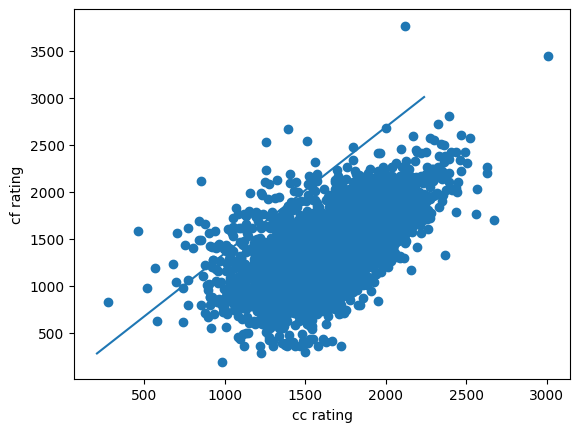

In [9]:
cc_rating = np.linspace(df['cc_rating'].min() , df['cc_rating'].max(),1000)
cf_rating = (w * cc_rating + b)
plt.scatter(df['cc_rating'],df['cf_rating'])
plt.plot(cf_rating,cc_rating)
plt.xlabel('cc rating')
plt.ylabel('cf rating')
plt.show()

### The model has been trained now we will be using the values of w and b in javascript for predicting rating